In [12]:
import numpy as np
import pandas as pd

In [29]:
news = pd.read_csv("News_small.txt", index_col=False , header=None)

In [30]:
news.head()

,0,1,2
0,63869,1507200566,Overnight action in the bitcoin price has been...
1,63870,1507198406,ICOs continue to infiltrate mainstream culture...
2,63871,1507197618,Two government employees in Crimea have been f...
3,63872,1507197464,"David Drake, the Chairman of LDJ Capital, will..."
4,63873,1507196988,ExHasta Catalyst is a decentralized innovation...


In [34]:
news = news.rename(index=str, columns={0: "uid", 1: "timestamp", 2:"text"})

In [35]:
news.head()

,uid,timestamp,text
0,63869,1507200566,Overnight action in the bitcoin price has been...
1,63870,1507198406,ICOs continue to infiltrate mainstream culture...
2,63871,1507197618,Two government employees in Crimea have been f...
3,63872,1507197464,"David Drake, the Chairman of LDJ Capital, will..."
4,63873,1507196988,ExHasta Catalyst is a decentralized innovation...


In [36]:
#!pip install langdetect
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
# NLP library imports
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
import os

[nltk_data] Downloading package punkt to /Users/Laiochen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Laiochen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
df = news
df.head()
df.text = df.text.apply(str)

/Users/Laiochen/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


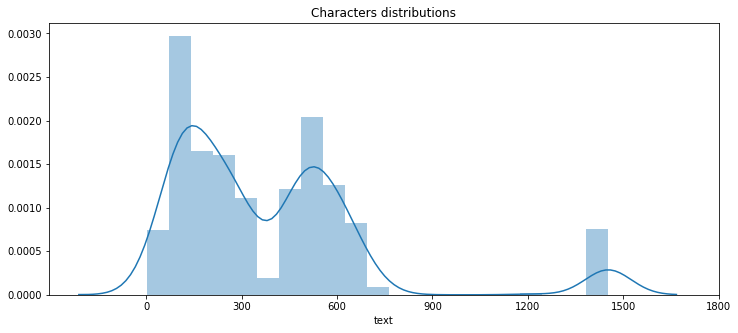

In [46]:
# Making the plot
x = plt.figure(figsize=(12,5))
sns.distplot(df['text'].apply(len))
plt.title('Characters distributions')
plt.xticks(range(0,2000,300))
plt.show()

In [48]:
# creating a list with all reviews
all_reviews = df.text.tolist()
len(all_reviews)

1331

In [49]:
# transformating comments into lower-case text 
lower_reviews = [review.lower() for review in all_reviews]

In [50]:
# deleting all specific caracters
characters_to_remove = ["@", "/", "#", ".", ",", "!", "?", "(", ")", "-", "_","’","'", "\"", ":",";","&"]
transformation_dict = {initial:" " for initial in characters_to_remove}
no_punctuation_reviews = [review.translate(str.maketrans(transformation_dict)) for review in lower_reviews]

In [51]:
# removing accent
with_accent = ['é', 'è', 'à']
without_accent = ['e', 'e', 'a']
transformation_dict = {before:after for before, after in zip(with_accent, without_accent)}
no_accent_reviews = [review.translate(str.maketrans(transformation_dict)) for review in no_punctuation_reviews]

In [52]:
# Displaying some results 
for i in range(5):
    print(all_reviews[i])
    print(no_accent_reviews[i])
    print('\n')

Overnight action in the bitcoin price has been pretty good to us. After what initially looked like it might be a pretty rough late US session (and, in turn, a cross over into the Japanese and European sessions this morning), things have turned around and the bulls are very much in control of price right &#8230; Continue reading Bitcoin Price Watch; Here Is What&#8217;s On This MorningThe post Bitcoin Price Watch; Here Is What&#8217;s On This Morning appeared first on NEWSBTC.
overnight action in the bitcoin price has been pretty good to us  after what initially looked like it might be a pretty rough late us session  and  in turn  a cross over into the japanese and european sessions this morning   things have turned around and the bulls are very much in control of price right   8230  continue reading bitcoin price watch  here is what  8217 s on this morningthe post bitcoin price watch  here is what  8217 s on this morning appeared first on newsbtc 


ICOs continue to infiltrate mainstre

In [53]:
def number_of_unique_words(list_of_reviews):
  
    # Concatenating all reviews from the list
    all_words = ''.join(list_of_reviews)

    # Tokenizing
    unique_tokens = set(word_tokenize(all_words))
  
    # Returning length of list
    return len(unique_tokens)

In [54]:
print(number_of_unique_words(all_reviews))

10780


In [55]:
print(number_of_unique_words(lower_reviews))

9146


In [56]:
print(number_of_unique_words(no_punctuation_reviews))

7817


In [57]:
print(number_of_unique_words(no_accent_reviews))

7817


# Pre-processing 2 : Tokenization

**Doing it in two different ways**

In [58]:
# Using regular expression
tokenized_reviews_re = [re.split('\s+', review) for review in no_accent_reviews]
#tokenized_reviews_re

In [62]:
# using NLP libraries
tokenized_reviews_nltk = [word_tokenize(review) for review in no_accent_reviews]
#tokenized_reviews_nltk[0:2]

**And making a comparison of results**

In [63]:
# Making a comparison between both of them
print("With NLTK  library : {}".format(len(tokenized_reviews_nltk)))
print("With RegEx library : {}".format(len(tokenized_reviews_re)))

With NLTK  library : 1331
With RegEx library : 1331


**Try to analyze the next lines of code and to understand the difference between both of them**

Here is an original review

In [64]:
# Choosing a review to inspect
n_review = 10
print(all_reviews[n_review])

Moya Networks, the Pan-African company that is set to roll out high-speed internet connection across the African Continent, organized a Meet-Up in Lagos on Friday to introduce investors and community members to the upcoming crowdsale. Facilitated by Core Media, the event was attended by more than 200 people.?Participants were taken through the MOYA Network ICO Whitepaper by Bami Jinadu, a well-known ICO expert in Nigeria. He highlighted how most ICOs are start-ups but unlike MOYA Network which is an already established business and merely introducing the Blockchain dimension. He stated:"We are all aware how Africa is struggling with a crappy internet connection, however, the MOYA business model is the solution to this headache," Bami told the investors, lauding the idea of a continental submarine Cable internet service.Nigeria and ICOsJinadu explained what to look for in an ICO before investing in it. He mentioned features like the team behind, Escrow, refund policy among others as som

And here are the tokenized ones

In [65]:
print(tokenized_reviews_nltk[n_review])

['moya', 'networks', 'the', 'pan', 'african', 'company', 'that', 'is', 'set', 'to', 'roll', 'out', 'high', 'speed', 'internet', 'connection', 'across', 'the', 'african', 'continent', 'organized', 'a', 'meet', 'up', 'in', 'lagos', 'on', 'friday', 'to', 'introduce', 'investors', 'and', 'community', 'members', 'to', 'the', 'upcoming', 'crowdsale', 'facilitated', 'by', 'core', 'media', 'the', 'event', 'was', 'attended', 'by', 'more', 'than', '200', 'people', 'participants', 'were', 'taken', 'through', 'the', 'moya', 'network', 'ico', 'whitepaper', 'by', 'bami', 'jinadu', 'a', 'well', 'known', 'ico', 'expert', 'in', 'nigeria', 'he', 'highlighted', 'how', 'most', 'icos', 'are', 'start', 'ups', 'but', 'unlike', 'moya', 'network', 'which', 'is', 'an', 'already', 'established', 'business', 'and', 'merely', 'introducing', 'the', 'blockchain', 'dimension', 'he', 'stated', 'we', 'are', 'all', 'aware', 'how', 'africa', 'is', 'struggling', 'with', 'a', 'crappy', 'internet', 'connection', 'however', 

In [66]:
print(tokenized_reviews_re[n_review])

['moya', 'networks', 'the', 'pan', 'african', 'company', 'that', 'is', 'set', 'to', 'roll', 'out', 'high', 'speed', 'internet', 'connection', 'across', 'the', 'african', 'continent', 'organized', 'a', 'meet', 'up', 'in', 'lagos', 'on', 'friday', 'to', 'introduce', 'investors', 'and', 'community', 'members', 'to', 'the', 'upcoming', 'crowdsale', 'facilitated', 'by', 'core', 'media', 'the', 'event', 'was', 'attended', 'by', 'more', 'than', '200', 'people', 'participants', 'were', 'taken', 'through', 'the', 'moya', 'network', 'ico', 'whitepaper', 'by', 'bami', 'jinadu', 'a', 'well', 'known', 'ico', 'expert', 'in', 'nigeria', 'he', 'highlighted', 'how', 'most', 'icos', 'are', 'start', 'ups', 'but', 'unlike', 'moya', 'network', 'which', 'is', 'an', 'already', 'established', 'business', 'and', 'merely', 'introducing', 'the', 'blockchain', 'dimension', 'he', 'stated', 'we', 'are', 'all', 'aware', 'how', 'africa', 'is', 'struggling', 'with', 'a', 'crappy', 'internet', 'connection', 'however', 

In [67]:
# We select the first one which seems more accurate
tokenized_reviews = tokenized_reviews_nltk

# Pre-processing 3 : Stopword removing

In [68]:
# Using a list with words to delete
stopW = stopwords.words('english')
stopW[0:5]

['i', 'me', 'my', 'myself', 'we']

In [69]:
# Customizing it with our needs
#stopW += ['les', 'a', 'tout']

In [70]:
# Stopword_list
stopword_reviews = [[token for token in review if token not in stopW] for review in tokenized_reviews]
print(stopword_reviews)           

[['overnight', 'action', 'bitcoin', 'price', 'pretty', 'good', 'us', 'initially', 'looked', 'like', 'might', 'pretty', 'rough', 'late', 'us', 'session', 'turn', 'cross', 'japanese', 'european', 'sessions', 'morning', 'things', 'turned', 'around', 'bulls', 'much', 'control', 'price', 'right', '8230', 'continue', 'reading', 'bitcoin', 'price', 'watch', '8217', 'morningthe', 'post', 'bitcoin', 'price', 'watch', '8217', 'morning', 'appeared', 'first', 'newsbtc'], ['icos', 'continue', 'infiltrate', 'mainstream', 'culture', 'major', 'russian', 'restaurant', 'chain', 'releasing', 'crypto', 'themed', 'menu'], ['two', 'government', 'employees', 'crimea', 'fired', 'getting', 'caught', 'mining', 'bitcoins', 'official', 'computers'], ['david', 'drake', 'chairman', 'ldj', 'capital', 'advise', 'icobox', 'key', 'market', 'aspects', 'including', 'industry', 'legal', 'regulation', 'international', 'business', 'development', 'investor', 'relations', 'post', 'cryptocurrency', 'heavyweight', 'david', 'dra

# Some visualization about what we've done

In [71]:
def plot_frequent_words(list_of_words):    
    dist = nltk.FreqDist(list_of_words)
    X = [nb[1] for nb in dist.most_common(30)]
    y = [nb[0] for nb in dist.most_common(30)]
    ax = sns.barplot(X,y)
    ax.set(xlabel='Word frequencies',ylabel='Words',title='Most common words in the corpus')
    plt.show()

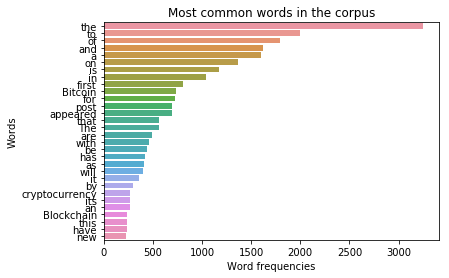

78555


In [72]:
# Making a first plot with original data
all_words = []
for review in all_reviews:
    for word in review.split():
        all_words.append(word)

plot_frequent_words(all_words)
print(len(all_words))

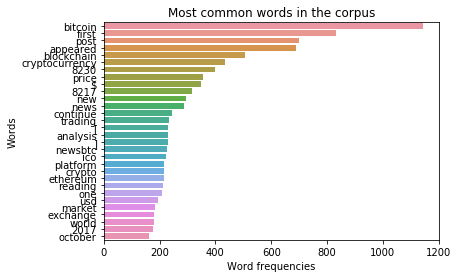

53357


In [76]:
# And making it with our current data
all_words = []
for review in stopword_reviews:
    for word in review:
        all_words.append(word)

plot_frequent_words(all_words)
print(len(all_words))



In [78]:
import string
import pandas as pd

In [154]:
# NLP library imports
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import bigrams

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/Laiochen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Laiochen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/Laiochen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Applying the transformation we've seen to our dataset

In [159]:
# Loading dataFrame
#df = pd.read_json('session_3_notebook_2.json')
# Preparing transformations for preprocessing function
caracters_to_remove = list(string.punctuation)
transformation_car_dict = {initial:" " for initial in caracters_to_remove}

with_accent = ['é', 'è', 'ê', 'à', 'ù', 'ç', 'ô', 'î']
without_accent = ['e', 'e', 'e', 'a', 'u', 'c', 'o', 'i']
transformation_accent_dict = {before:after for before, after in zip(with_accent, without_accent)}

#stopW = stopwords.words('french')
stopW = stopwords.words('english')

#stopW += ['les', 'a', 'tout']


# Preprocessing function to apply to the content column
def preprocessing(review):
  
    # Tokenization
    tokens = word_tokenize(review)
    
    # Deleting words with  only one caracter
    tokens = [token for token in tokens if len(token)>2]
    
    # stopwords + lowercase
    tokens = [token.lower() for token in tokens if token.lower() not in stopW]   
    
    # Removing accents
    tokens = [token.translate(str.maketrans(transformation_accent_dict)) for token in tokens]
    
    # Deleting specific caracters
    tokens = [token.translate(str.maketrans(transformation_car_dict)) for token in tokens]
        
    return tokens
  

# Creating a new column swith tokenized reviews
df['tokens'] = df['text'].apply(preprocessing)

# Displaying part of the result
df.tail()

,uid,timestamp,text,tokens,inflected,lemmantized_reviews
1326,65195,1378287000,Mt. Gox is the greatest Bitcoin exchange in the world providing a range of different transactions.,"[gox, greatest, bitcoin, exchange, world, providing, range, different, transactions]","[gox, great, bitcoin, exchange, world, provide, range, different, transaction]",[Mt. Gox is the greatest Bitcoin exchange in the world providing a range of different transactions. ]
1327,65196,1378056000,"Internet comments are periodically similar to Hobessian: they are cruel, unpleasant and rather brief. Therefore, people make compulsory the emphasizing the most reasonable and measured exchanges occurring in this blog.","[internet, comments, periodically, similar, hobessian, cruel, unpleasant, rather, brief, therefore, people, make, compulsory, emphasizing, reasonable, measured, exchanges, occurring, blog]","[internet, comment, periodically, similar, hobessian, cruel, unpleasant, rather, brief, therefore, people, make, compulsory, emphasize, reasonable, measure, exchange, occur, blog]","[Internet comments are periodically similar to Hobessian: they are cruel, unpleasant and rather brief. Therefore, people make compulsory the emphasizing the most reasonable and measured exchanges occurring in this blog. ]"
1328,65197,1377614100,"Yesterday Bitcoin Foundation had a meeting with US government representatives, which was very productive and encouraging for both Bitcoin industry and US currency market.","[yesterday, bitcoin, foundation, meeting, government, representatives, productive, encouraging, bitcoin, industry, currency, market]","[yesterday, bitcoin, foundation, meet, government, representative, productive, encourage, bitcoin, industry, currency, market]","[Yesterday Bitcoin Foundation had a meeting with US government representatives, which was very productive and encouraging for both Bitcoin industry and US currency market. ]"
1329,65198,1375696200,"LocalBitcoins.com sponsored an ambitious motorcycle trip across the wild continent of Africa, and bring the #BitcoinAfrica tour.","[localbitcoins com, sponsored, ambitious, motorcycle, trip, across, wild, continent, africa, bring, bitcoinafrica, tour]","[localbitcoins com, sponsor, ambitious, motorcycle, trip, across, wild, continent, africa, bring, bitcoinafrica, tour]","[LocalBitcoins.com sponsored an ambitious motorcycle trip across the wild continent of Africa, and bring the #BitcoinAfrica tour. ]"
1330,65199,1375374600,"Re-election of Ben Bernanke, the chief of the Federal Reserve, is taking place in United States right now, which is a big responsibility of the president, Barack Obama.","[re election, ben, bernanke, chief, federal, reserve, taking, place, united, states, right, big, responsibility, president, barack, obama]","[re election, ben, bernanke, chief, federal, reserve, take, place, unite, state, right, big, responsibility, president, barack, obama]","[Re-election of Ben Bernanke, the chief of the Federal Reserve, is taking place in United States right now, which is a big responsibility of the president, Barack Obama.]"


In [166]:
bgrs = df['tokens'].apply(bigrams)
df['bigrams'] = [[y for y in x] for x in bgrs]

In [190]:
#df.bigrams = df.bigrams.apply(lambda x: [y[0]+" "+ y[1] for y in x])

# Discovering [Stemming](https://en.wikipedia.org/wiki/Stemming) and [Lemmatisation](https://en.wikipedia.org/wiki/Lemmatisation)


If you want to understand how the [Porter Algorithm](https://fr.wikipedia.org/wiki/Racinisation#Algorithme_de_Porter) works.

In [82]:
#create Stemmer objects
porter = PorterStemmer()
lancaster=LancasterStemmer()

## Visualizing the effects of two different stemmers on basic words

In [83]:
#A list of words to be stemmed
word_list = ["friend", "friendship", "friends", "friendships","stabil","destabilize","misunderstanding","railroad","moonlight","football"]
print("{0:20}{1:20}{2:20}".format("Word","Porter Stemmer","lancaster Stemmer"))
for word in word_list:
    print("{0:20}{1:20}{2:20}".format(word,porter.stem(word),lancaster.stem(word)))

Word                Porter Stemmer      lancaster Stemmer   
friend              friend              friend              
friendship          friendship          friend              
friends             friend              friend              
friendships         friendship          friend              
stabil              stabil              stabl               
destabilize         destabil            dest                
misunderstanding    misunderstand       misunderstand       
railroad            railroad            railroad            
moonlight           moonlight           moonlight           
football            footbal             footbal             


## Effects on a total sentence

In [84]:
def stemSentence(sentence, stemmer):
    
    token_words = word_tokenize(sentence)
    stem_sentence = []
    
    for word in token_words:
        stem_sentence.append(stemmer.stem(word))
        stem_sentence.append(" ")
    
    return "".join(stem_sentence)

In [85]:
# And compare differences
sentence="Pythoners are very intelligent and work very pythonly and now they are pythoning their way to success."

print(stemSentence(sentence, lancaster))
print(stemSentence(sentence, porter))

python ar very intellig and work very python and now they ar python their way to success . 
python are veri intellig and work veri pythonli and now they are python their way to success . 


In [86]:
# Look at what is happening on a french sentence
sentence="Ce matin je suis allé acheter une galette à la boulangerie puis je me suis régalé avant de venir en cours."

print(stemSentence(sentence, lancaster))
print(stemSentence(sentence, porter))

ce matin je sui allé achet un galet à la boulangery pui je me sui régalé av de venir en cour . 
Ce matin je sui allé achet une galett à la boulangeri pui je me sui régalé avant de venir en cour . 


## A stemmer to use on different languages (for example french..)

In [87]:
def frenchStemSentence(sentence):
    frenchStemmer=SnowballStemmer("french", ignore_stopwords=False)
    token_words=word_tokenize(sentence)
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(frenchStemmer.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

frenchStemSentence("cette phrase est à la fois amusante et surprenante")

'cet phras est à la fois amus et surpren '

## Having a look at lemmatization

In [88]:
# Initiate lemmatizer
lemmatizer = WordNetLemmatizer()

# Create lematizing function
def lemmatize(sentence):
    tokens=word_tokenize(sentence)
    tokens = [lemmatizer.lemmatize(lemmatizer.lemmatize(lemmatizer.lemmatize(token,pos='a'),pos='v'),pos='n') for token in tokens]
    return " ".join(tokens)

# And display results
lemmer = lemmatize("Such an analysis can reveal features that are not easily visible from the variations in the individual genes and can lead to a picture of expression that is more biologically transparent")

In [89]:
lemmer

'Such an analysis can reveal feature that be not easily visible from the variation in the individual gene and can lead to a picture of expression that be more biologically transparent'

# Applying one of those modification to our dataset

 **Preparing both functions**

In [90]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatize(tokens):
    tokens = [lemmatizer.lemmatize(lemmatizer.lemmatize(lemmatizer.lemmatize(token,pos='a'),pos='v'),pos='n') for token in tokens]
    return tokens  

# Stemming
frenchStemmer=SnowballStemmer("french")
def stem(tokens):
    tokens = [frenchStemmer.stem(token) for token in tokens]
    return tokens  


**Selecting which one to apply, given the language used in your reviews**

In [91]:
# Are your reviews in English ? (here it is unfortunately not the case)
english = True

**And finally applying it to our dataFrame**

In [92]:
# Making appropriate modification
if english:
    df['inflected']= df['tokens'].apply(lemmatize)

else:
    df['inflected']= df['tokens'].apply(stem)

# And displaying results
df.head()

,uid,timestamp,text,tokens,inflected
0,63869,1507200566,Overnight action in the bitcoin price has been...,"[overnight, action, bitcoin, price, pretty, go...","[overnight, action, bitcoin, price, pretty, go..."
1,63870,1507198406,ICOs continue to infiltrate mainstream culture...,"[icos, continue, infiltrate, mainstream, cultu...","[icos, continue, infiltrate, mainstream, cultu..."
2,63871,1507197618,Two government employees in Crimea have been f...,"[two, government, employees, crimea, fired, ge...","[two, government, employee, crimea, fire, get,..."
3,63872,1507197464,"David Drake, the Chairman of LDJ Capital, will...","[david, drake, chairman, ldj, capital, advise,...","[david, drake, chairman, ldj, capital, advise,..."
4,63873,1507196988,ExHasta Catalyst is a decentralized innovation...,"[exhasta, catalyst, decentralized, innovation,...","[exhasta, catalyst, decentralize, innovation, ..."


# Final modification

# TF/IDF from scratch

## Initialization and preprocessing
Let's take two sentences as an example

In [94]:
import pandas as pd
%matplotlib inline 

## Compare our matrix with Python implementation

In [95]:
from nltk import word_tokenize
from string import punctuation
from nltk.corpus import stopwords

stopW = stopwords.words('english') + list(punctuation)

In [168]:
#bag_of_words = list(df.inflected.values)
bag_of_words = list(df.bigrams.values)

In [169]:
bag_of_words[0:5]

[[('overnight', 'action'),
  ('action', 'bitcoin'),
  ('bitcoin', 'price'),
  ('price', 'pretty'),
  ('pretty', 'good'),
  ('good', 'initially'),
  ('initially', 'looked'),
  ('looked', 'like'),
  ('like', 'might'),
  ('might', 'pretty'),
  ('pretty', 'rough'),
  ('rough', 'late'),
  ('late', 'session'),
  ('session', 'turn'),
  ('turn', 'cross'),
  ('cross', 'japanese'),
  ('japanese', 'european'),
  ('european', 'sessions'),
  ('sessions', 'morning'),
  ('morning', 'things'),
  ('things', 'turned'),
  ('turned', 'around'),
  ('around', 'bulls'),
  ('bulls', 'much'),
  ('much', 'control'),
  ('control', 'price'),
  ('price', 'right'),
  ('right', '8230'),
  ('8230', 'continue'),
  ('continue', 'reading'),
  ('reading', 'bitcoin'),
  ('bitcoin', 'price'),
  ('price', 'watch'),
  ('watch', '8217'),
  ('8217', 'morningthe'),
  ('morningthe', 'post'),
  ('post', 'bitcoin'),
  ('bitcoin', 'price'),
  ('price', 'watch'),
  ('watch', '8217'),
  ('8217', 'morning'),
  ('morning', 'appeared'),

In [170]:
for i, sent in enumerate(bag_of_words):
    bag_of_words[i] = [w for w in bag_of_words[i] if w not in stopW]

In [172]:
#bag_of_words

[[('overnight', 'action'),
  ('action', 'bitcoin'),
  ('bitcoin', 'price'),
  ('price', 'pretty'),
  ('pretty', 'good'),
  ('good', 'initially'),
  ('initially', 'looked'),
  ('looked', 'like'),
  ('like', 'might'),
  ('might', 'pretty'),
  ('pretty', 'rough'),
  ('rough', 'late'),
  ('late', 'session'),
  ('session', 'turn'),
  ('turn', 'cross'),
  ('cross', 'japanese'),
  ('japanese', 'european'),
  ('european', 'sessions'),
  ('sessions', 'morning'),
  ('morning', 'things'),
  ('things', 'turned'),
  ('turned', 'around'),
  ('around', 'bulls'),
  ('bulls', 'much'),
  ('much', 'control'),
  ('control', 'price'),
  ('price', 'right'),
  ('right', '8230'),
  ('8230', 'continue'),
  ('continue', 'reading'),
  ('reading', 'bitcoin'),
  ('bitcoin', 'price'),
  ('price', 'watch'),
  ('watch', '8217'),
  ('8217', 'morningthe'),
  ('morningthe', 'post'),
  ('post', 'bitcoin'),
  ('bitcoin', 'price'),
  ('price', 'watch'),
  ('watch', '8217'),
  ('8217', 'morning'),
  ('morning', 'appeared'),

In [173]:
#doc = [" ".join(x) for x in bag_of_words]
doc = list(df.text.values)

In [174]:
from string import punctuation
from nltk.corpus import stopwords

stopW = stopwords.words('english') + list(punctuation)
more_stopwords=['n\'t','...','\'ve','\'re', 'ã\x9dou', "''" ]

In [192]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize

vect = TfidfVectorizer(tokenizer=word_tokenize,stop_words=stopW+more_stopwords)
vect_transformed = vect.fit_transform(doc)
#vect_transformed

<1331x8172 sparse matrix of type '<class 'numpy.float64'>'
	with 42456 stored elements in Compressed Sparse Row format>

In [176]:
import numpy as np
feature_names = np.array(vect.get_feature_names())
sorted_tfidf_index = vect_transformed.max(0).toarray()[0].argsort()

print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest tfidf:
['phenomenal' 'came-in' 'discount.the' 'euros' 'exceeded' '3:00pm'
 'substantial' 'legitimately.' 'pack' 'cipi']

Largest tfidf: 
['nan' 'u+200b' 'bubble' 'cryptovest' 'update' 'invest' 'accusations' '--'
 'drops' 'volatility']


In [187]:
df_sklearn = pd.DataFrame(vect_transformed.todense(), columns = feature_names)
df_sklearn.tail()

,'ll,'s,'the,--,-enabled,./coin,./gencoin,.0007,.0015,.1960,...,zlote,znanstveno,zniu,zone,zones,zonethe,zooko,zug,zumminer,zuokas
1326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [178]:
df_sklearn.to_csv("TFIDF.csv")

They have similar values. Not exactly the same because the formulas used to comput the TF-IDF scores are different.

## Build a bar chart

In [179]:
df_sklearn_mean = df_sklearn.mean().sort_values(ascending=False).to_frame(name='tfidf mean')
df_sklearn_mean.head()

,tfidf mean
bitcoin,0.044294
first,0.027525
blockchain,0.025039
post,0.024523
appeared,0.024272


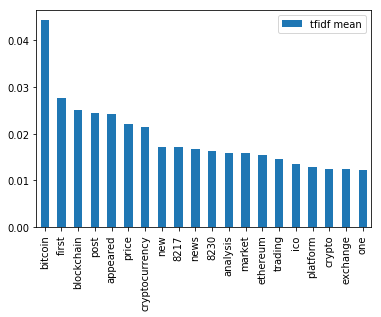

In [180]:
df_sklearn_mean[:20].plot.bar()

## Build a word cloud

In [181]:
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt

In [182]:
dict_words_tfidf = df_sklearn_mean[df_sklearn_mean['tfidf mean'] != 0].to_dict()['tfidf mean']

In [183]:
#read mask (just for fun)
hotel_mask = np.array(Image.open("hotel.jpg"))

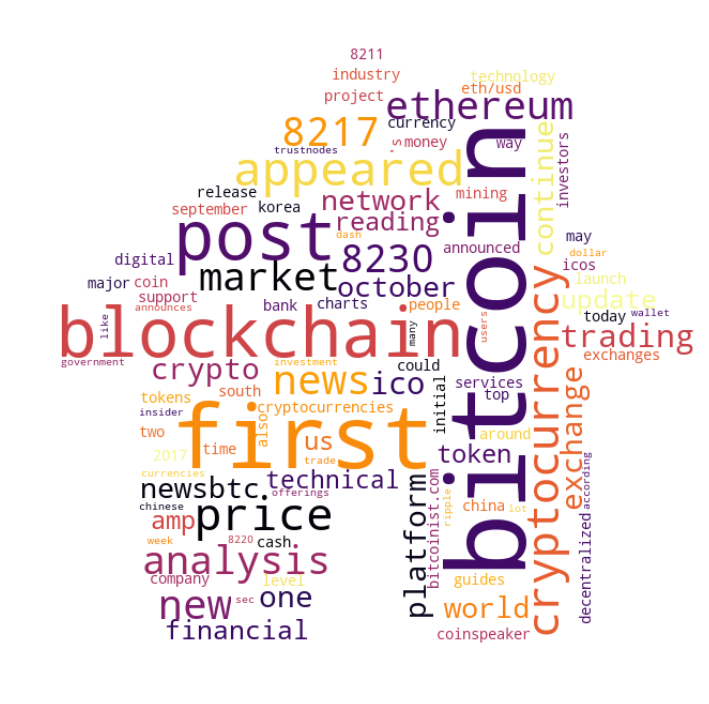

In [184]:
wordcloud = WordCloud(height=600, width=800, background_color="white", colormap='inferno', max_words=100, mask=hotel_mask)
wordcloud.generate_from_frequencies(frequencies=dict_words_tfidf)
plt.figure(figsize=(12,16))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [185]:
import pandas as pd
pd.set_option("display.max_colwidth", 40)
import numpy as np
import re
import spacy
import nltk
from nltk import FreqDist
import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

%matplotlib inline

[nltk_data] Downloading package punkt to /Users/Laiochen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Laiochen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load  Data

In [193]:
df.head()

,uid,timestamp,text,tokens,inflected,lemmantized_reviews,bigrams
0,63869,1507200566,Overnight action in the bitcoin pric...,"[overnight, action, bitcoin, price, ...","[overnight, action, bitcoin, price, ...",[Overnight action in the bitcoin pri...,"[overnight action, action bitcoin, b..."
1,63870,1507198406,ICOs continue to infiltrate mainstre...,"[icos, continue, infiltrate, mainstr...","[icos, continue, infiltrate, mainstr...",[ICOs continue to infiltrate mainstr...,"[icos continue, continue infiltrate,..."
2,63871,1507197618,Two government employees in Crimea h...,"[two, government, employees, crimea,...","[two, government, employee, crimea, ...",[Two government employees in Crimea ...,"[two government, government employee..."
3,63872,1507197464,"David Drake, the Chairman of LDJ Cap...","[david, drake, chairman, ldj, capita...","[david, drake, chairman, ldj, capita...","[David Drake, the Chairman of LDJ Ca...","[david drake, drake chairman, chairm..."
4,63873,1507196988,ExHasta Catalyst is a decentralized ...,"[exhasta, catalyst, decentralized, i...","[exhasta, catalyst, decentralize, in...",[ExHasta Catalyst is a decentralized...,"[exhasta catalyst, catalyst decentra..."


In [120]:
#the lemmantized_reviews are interpreted as a string by the read_csv command. We convert it into a list. 
df['lemmantized_reviews'] = df['text'].str.replace(r"[\[\]\']", "").str.split(", ")

In [121]:
df['lemmantized_reviews'][0][:10] #checking if it's a list

['Overnight action in the bitcoin price has been pretty good to us. After what initially looked like it might be a pretty rough late US session (and',
 'in turn',
 'a cross over into the Japanese and European sessions this morning)',
 'things have turned around and the bulls are very much in control of price right &#8230; Continue reading Bitcoin Price Watch; Here Is What&#8217;s On This MorningThe post Bitcoin Price Watch; Here Is What&#8217;s On This Morning appeared first on NEWSBTC.']

In [122]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Laiochen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Laiochen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [123]:
# Loading dataFrame
#df = pd.read_json('session_3_notebook_2.json')
# Preparing transformations for preprocessing function
#caracters_to_remove = list(string.punctuation)
#transformation_car_dict = {initial:" " for initial in caracters_to_remove}

with_accent = ['é', 'è', 'ê', 'à', 'ù', 'ç', 'ô', 'î']
without_accent = ['e', 'e', 'e', 'a', 'u', 'c', 'o', 'i']
transformation_accent_dict = {before:after for before, after in zip(with_accent, without_accent)}

#stopW = stopwords.words('french')
stopW = stopwords.words('french')
stopW += ['les', 'a', 'tout']


# Preprocessing function to apply to the content column
def preprocessing(tokens):
  
    # Tokenization
    
    # Deleting words with  only one caracter
    tokens = [token for token in tokens if len(token)>2]
    
    # stopwords + lowercase
    tokens = [token.lower() for token in tokens if token.lower() not in stopW]   
        
    return tokens
  

# Creating a new column swith tokenized reviews
df['tokens'] = df['lemmantized_reviews'].apply(preprocessing)

# Displaying part of the result
df.tail()

,uid,timestamp,text,tokens,inflected,lemmantized_reviews
1326,65195,1378287000,Mt. Gox is the greatest Bitcoin exchange in th...,[mt. gox is the greatest bitcoin exchange in t...,"[gox, great, bitcoin, exchange, world, provide...",[Mt. Gox is the greatest Bitcoin exchange in t...
1327,65196,1378056000,Internet comments are periodically similar to ...,[internet comments are periodically similar to...,"[internet, comment, periodically, similar, hob...",[Internet comments are periodically similar to...
1328,65197,1377614100,Yesterday Bitcoin Foundation had a meeting wit...,[yesterday bitcoin foundation had a meeting wi...,"[yesterday, bitcoin, foundation, meet, governm...",[Yesterday Bitcoin Foundation had a meeting wi...
1329,65198,1375696200,LocalBitcoins.com sponsored an ambitious motor...,[localbitcoins.com sponsored an ambitious moto...,"[localbitcoins com, sponsor, ambitious, motorc...",[LocalBitcoins.com sponsored an ambitious moto...
1330,65199,1375374600,"Re-election of Ben Bernanke, the chief of the ...","[re-election of ben bernanke, the chief of the...","[re election, ben, bernanke, chief, federal, r...","[Re-election of Ben Bernanke, the chief of the..."


In [127]:
data = df

In [128]:
data.dropna(subset=['lemmantized_reviews'], inplace=True)

In [129]:
data.shape

(1331, 6)

## Remove words

In [130]:
# We list the words we want to get rid of
list_stop_words = ["good", "great", "one", "nt", "u2013", "", "would", "get", "center", "parcs", 'u00e0', 'cottag', 'plus', 'cest','u00e7', 'u00e9t', 'car', 'fait', 'dir', 'h', 'person', 'dit', 'donc', 'lu00e0', 'parc', 'bien', 'il', 'tre','tru00e8']

In [131]:
def remove_stop_word(x, list_stop_words=list_stop_words):
    clean_x = [l for l in x if l not in list_stop_words]
    return clean_x

In [132]:
data['lemmantized_reviews'] = data['lemmantized_reviews'].apply(remove_stop_word)

In [133]:
data.head()

,uid,timestamp,text,tokens,inflected,lemmantized_reviews
0,63869,1507200566,Overnight action in the bitcoin price has been...,[overnight action in the bitcoin price has bee...,"[overnight, action, bitcoin, price, pretty, go...",[Overnight action in the bitcoin price has bee...
1,63870,1507198406,ICOs continue to infiltrate mainstream culture...,[icos continue to infiltrate mainstream cultur...,"[icos, continue, infiltrate, mainstream, cultu...",[ICOs continue to infiltrate mainstream cultur...
2,63871,1507197618,Two government employees in Crimea have been f...,[two government employees in crimea have been ...,"[two, government, employee, crimea, fire, get,...",[Two government employees in Crimea have been ...
3,63872,1507197464,"David Drake, the Chairman of LDJ Capital, will...","[david drake, the chairman of ldj capital, wil...","[david, drake, chairman, ldj, capital, advise,...","[David Drake, the Chairman of LDJ Capital, wil..."
4,63873,1507196988,ExHasta Catalyst is a decentralized innovation...,[exhasta catalyst is a decentralized innovatio...,"[exhasta, catalyst, decentralize, innovation, ...",[ExHasta Catalyst is a decentralized innovatio...


In [134]:
data.shape

(1331, 6)

## Building an LDA model

In [146]:
dictionary = corpora.Dictionary(data['inflected'])

In [147]:
len(dictionary)

6390

In [148]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in data['inflected']]

In [149]:
#print(doc_term_matrix[:10])

In [150]:
import warnings
warnings.filterwarnings('ignore')

# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
num_topics = 4
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, 
                num_topics=num_topics, 
                alpha=[0.0001] * num_topics, 
                eta=[0.0001] * len(dictionary),
                chunksize=2000,
                passes=4,
                random_state=100,
               )

In [151]:
lda_model.print_topics(num_words=8)

[(0,
  '0.033*"bitcoin" + 0.020*"first" + 0.018*"post" + 0.018*"appear" + 0.015*"cryptocurrency" + 0.012*"blockchain" + 0.011*"news" + 0.011*"8230"'),
 (1,
  '0.011*"bitcoin" + 0.010*"first" + 0.009*"blockchain" + 0.009*"price" + 0.008*"appear" + 0.007*"post" + 0.007*"project" + 0.007*"cryptocurrency"'),
 (2,
  '0.028*"bitcoin" + 0.017*"first" + 0.017*"price" + 0.015*"post" + 0.015*"appear" + 0.011*"analysis" + 0.010*"trade" + 0.010*"8230"'),
 (3,
  '0.023*"first" + 0.019*"appear" + 0.018*"post" + 0.011*"bitcoin" + 0.011*"platform" + 0.010*"cryptocurrency" + 0.010*"announce" + 0.010*"network"')]

## Topic visualization

In [152]:
# Visualize the topics
pd.options.display.max_colwidth = 2000
viz = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary, mds='tsne')

In [153]:
pyLDAvis.enable_notebook()
viz

PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
1      31.064997        1       1  238.310089 -174.508530
0      29.792543        1       2   36.622463 -320.915588
2      23.994312        1       3 -109.763977 -119.213173
3      15.148151        1       4   91.923546   27.193834, topic_info=     Category         Freq            Term        Total  loglift  logprob
term                                                                     
26    Default   362.000000           price   362.000000  30.0000  30.0000
11    Default   837.000000           first   837.000000  29.0000  29.0000
5     Default  1095.000000         bitcoin  1095.000000  28.0000  28.0000
394   Default   129.000000       technical   129.000000  27.0000  27.0000
24    Default   708.000000            post   708.000000  26.0000  26.0000
3     Default   723.000000          appear   723.000000  25.0000  25.0000
81    Default   178.000000        announce   178.000000  24.0000  24.0000
253   Default   166.000000         network   166.000000  23.0000  23.0000
64    Default   430.000000  cryptocurrency   430.000000  22.0000  22.0000
348   Default   239.000000        platform   239.000000  21.0000  21.0000
366   Default   227.000000        analysis   227.000000  20.0000  20.0000
190   Default   209.000000             ico   209.000000  19.0000  19.0000
160   Default   289.000000            news   289.000000  18.0000  18.0000
107   Default    64.000000            sale    64.000000  17.0000  17.0000
108   Default   232.000000           token   232.000000  16.0000  16.0000
2922  Default    65.000000          u 200b    65.000000  15.0000  15.0000
1264  Default    74.000000           korea    74.000000  14.0000  14.0000
497   Default    82.000000           south    82.000000  13.0000  13.0000
4488  Default   100.000000            wave   100.000000  12.0000  12.0000
206   Default   136.000000            coin   136.000000  11.0000  11.0000
549   Default    29.000000         binance    29.000000  10.0000  10.0000
442   Default    82.000000         initial    82.000000   9.0000   9.0000
292   Default   180.000000          launch   180.000000   8.0000   8.0000
0     Default   318.000000            8217   318.000000   7.0000   7.0000
408   Default   161.000000            make   161.000000   6.0000   6.0000
493   Default   152.000000           offer   152.000000   5.0000   5.0000
62    Default    95.000000     coinspeaker    95.000000   4.0000   4.0000
421   Default   114.000000           chart   114.000000   3.0000   3.0000
2819  Default    40.000000             neo    40.000000   2.0000   2.0000
388   Default    80.000000           level    80.000000   1.0000   1.0000
...       ...          ...             ...          ...      ...      ...
497    Topic4    39.872166           south    82.873459   1.1557  -5.2509
348    Topic4    81.445778        platform   239.909332   0.8070  -4.5367
442    Topic4    37.655766         initial    82.471619   1.1033  -5.3081
2129   Topic4    10.342222           dubai    13.652275   1.6096  -6.6004
11     Topic4   173.290543           first   837.316284   0.3121  -3.7816
62     Topic4    38.331764     coinspeaker    95.264481   0.9769  -5.2903
3      Topic4   147.269653          appear   723.472717   0.2955  -3.9443
206    Topic4    47.273998            coin   136.011536   0.8305  -5.0807
24     Topic4   139.131073            post   708.258301   0.2599  -4.0012
292    Topic4    56.411366          launch   180.839462   0.7224  -4.9039
408    Topic4    51.044376            make   161.518524   0.7354  -5.0039
190    Topic4    59.901394             ico   209.382431   0.6358  -4.8439
37     Topic4    31.992830            icos    79.095589   0.9821  -5.4711
493    Topic4    48.162884           offer   152.619614   0.7339  -5.0620
108    Topic4    61.426113           token   232.419373   0.5566  -4.8188
131    Topic4    33.247227         payment    88.698570  

## Building an LDA model

In [194]:
dictionary = corpora.Dictionary(data['bigrams'])

In [195]:
len(dictionary)

32112

In [199]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in data['bigrams']]

In [200]:
#print(doc_term_matrix[:10])

In [201]:
import warnings
warnings.filterwarnings('ignore')

# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
num_topics = 4
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, 
                num_topics=num_topics, 
                alpha=[0.0001] * num_topics, 
                eta=[0.0001] * len(dictionary),
                chunksize=2000,
                passes=4,
                random_state=100,
               )

In [202]:
lda_model.print_topics(num_words=8)

[(0,
  '0.013*"appeared first" + 0.008*"first newsbtc" + 0.007*"continue reading" + 0.007*"8230 continue" + 0.005*"technical analysis" + 0.004*"price technical" + 0.004*"bitcoin price" + 0.002*"ripple price"'),
 (1,
  '0.012*"appeared first" + 0.004*"8230 post" + 0.004*"first bitcoin" + 0.003*"blockchain technology" + 0.002*"bitcoin network" + 0.002*"first newsbtc" + 0.002*"first coinspeaker" + 0.002*"continue reading"'),
 (2,
  '0.013*"appeared first" + 0.004*"8230 post" + 0.004*"first bitcoin" + 0.004*"u 200b u 200b" + 0.003*"initial coin" + 0.002*"south korea" + 0.002*"first newsbtc" + 0.002*"8230 continue"'),
 (3,
  '0.018*"appeared first" + 0.006*"first newsbtc" + 0.006*"8230 continue" + 0.006*"continue reading" + 0.005*"8230 post" + 0.004*"first bitcoin" + 0.004*"technical analysis" + 0.003*"bitcoin cash"')]

## Topic visualization

In [203]:
# Visualize the topics
pd.options.display.max_colwidth = 2000
viz = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary, mds='tsne')

In [204]:
pyLDAvis.enable_notebook()
viz

PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
3      27.606031        1       1   61.776333   35.077950
1      27.595642        1       2 -148.298218 -506.401367
0      23.704851        1       3 -314.102814 -130.583328
2      21.093481        1       4  227.582352 -340.738800, topic_info=      Category        Freq                Term       Total  loglift  logprob
term                                                                        
9735   Default   41.000000       u 200b u 200b   41.000000  30.0000  30.0000
776    Default   67.000000     price technical   67.000000  29.0000  29.0000
12     Default  220.000000       first newsbtc  220.000000  28.0000  28.0000
8      Default  210.000000    continue reading  210.000000  27.0000  27.0000
891    Default   26.000000        ripple price   26.000000  26.0000  26.0000
2      Default  210.000000       8230 continue  210.000000  25.0000  25.0000
550    Default  121.000000  technical analysis  121.000000  24.0000  24.0000
766    Default   21.000000      key highlights   21.000000  23.0000  23.0000
759    Default   20.000000      ethereum price   20.000000  22.0000  22.0000
764    Default   28.000000        hourly chart   28.000000  21.0000  21.0000
1564   Default   48.000000       press release   48.000000  20.0000  20.0000
4271   Default   16.000000       classic price   16.000000  19.0000  19.0000
747    Default   17.000000    analysis eth usd   17.000000  18.0000  18.0000
31507  Default   20.000000      ultricies nisi   20.000000  17.0000  17.0000
864    Default   16.000000       bullish trend   16.000000  16.0000  16.0000
594    Default   74.000000     bitcoin network   74.000000  15.0000  15.0000
920    Default   28.000000          cash price   28.000000  14.0000  14.0000
597    Default   69.000000        network news   69.000000  13.0000  13.0000
598    Default   69.000000         news charts   69.000000  12.0000  12.0000
596    Default   69.000000          guides amp   69.000000  11.0000  11.0000
593    Default   69.000000        amp analysis   69.000000  10.0000  10.0000
595    Default   69.000000       charts guides   69.000000   9.0000   9.0000
860    Default   15.000000    analysis xrp usd   15.000000   8.0000   8.0000
781    Default   22.000000          trend line   22.000000   7.0000   7.0000
126    Default   35.000000          token sale   35.000000   6.0000   6.0000
4279   Default   19.000000    ethereum classic   19.000000   5.0000   5.0000
198    Default   31.000000       goldman sachs   31.000000   4.0000   4.0000
754    Default   23.000000           data feed   23.000000   3.0000   3.0000
777    Default   13.000000    reading ethereum   13.000000   2.0000   2.0000
760    Default   13.000000            feed via   13.000000   1.0000   1.0000
...        ...         ...                 ...         ...      ...      ...
3883    Topic4   11.195678         jamie dimon   17.064220   1.1347  -6.8253
487     Topic4   22.681414       2017 appeared   44.938465   0.8725  -6.1193
994     Topic4   19.223757     insider bitcoin   35.932404   0.9307  -6.2847
3830    Topic4   23.975571         south korea   51.024574   0.8009  -6.0638
987     Topic4   15.873035    bitcoin ethereum   28.972883   0.9545  -6.4762
986     Topic4   20.150654  bitcoin blockchain   40.914917   0.8479  -6.2376
4       Topic4  133.910446      appeared first  680.774658  -0.0699  -4.3437
723     Topic4   27.671162        initial coin   73.045975   0.5855  -5.9204
8331    Topic4   13.734686      september 2017   25.940407   0.9203  -6.6209
988     Topic4   21.081993     blockchain news   51.004261   0.6727  -6.1924
194     Topic4   43.526634       first bitcoin  172.608795   0.1786  -5.4675
993     Topic4   19.217978        first crypto   47.107918   0.6596  -6.2850
173     Topic4   44.420822           8230 post  186.652740   0.1207  -5.4471
989     Topic4   19.298927      crypto insider   50.099785   0.6022